In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append("../../../src")
from mask_dataset import MaskedDataset
dataset = MaskedDataset(model_name='mbert')

Load pre-saved file /home/xzhao/workspace/probing-mulitlingual/result/dataset-mbert/mlama-dataset.pkl for MaskedDataset instance


Drawing 

In [6]:
from pred_evaluation import calculate_langsim_by_objectwise_p1_without_rel, draw_heatmap_for_pairwise_langsim_based_on_uuid_matching_rate
langs_by_family = [
    'en', 'de', 'nl', 'da',
    'id', 'ms', 'vi', 
    'pl', 'cs', 'sk', 'hu', 
    'hi', 'bn', 'ur']
# langs_by_family = [
#     'en', 
#     'es', 'nl', 'pt', 'ca', 'da', 'sv', 'fr', 'af', 'gl', 'it', 'de', 'hu', 'ro',
#     'id', 'ms', 'vi', 'cs',  'fa', 
#     'cy', 'el', 'he', 'ko', 'ar', 'et',
#     'tr', 'hr', 'ceb', 'zh', 'pl']

langs, rels, dists = calculate_langsim_by_objectwise_p1_without_rel(dataset)
# draw_heatmap_for_pairwise_langsim_based_on_uuid_matching_rate(dataset, langs, dists, sorted=True)

lbf_idx = [langs.index(lang) for lang in langs_by_family]
reidx_dists = dists[np.ix_(lbf_idx, lbf_idx)]
dists = 1 - reidx_dists

langs = langs_by_family
similarity = 1 - dists


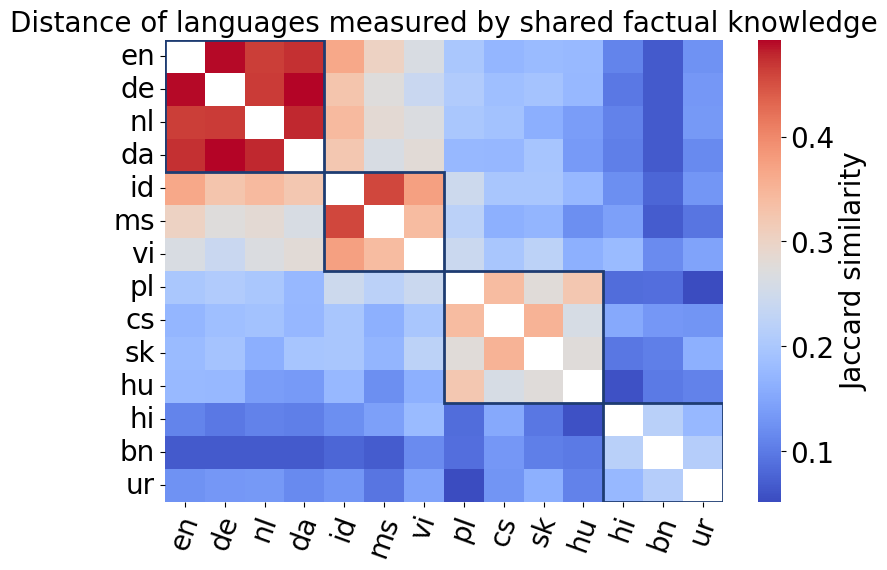

In [7]:
import matplotlib.patches as patches

plt.rcParams['ps.useafm'] = True
plt.rcParams['pdf.use14corefonts'] = True

sorted = False
if sorted:
    reidx = np.argsort(similarity[langs.index('en')])[::-1]
    langs = [langs[idx] for idx in reidx]
    similarity = similarity[reidx, :][:, reidx]

import matplotlib.pyplot as plt
import seaborn as sns

np.fill_diagonal(similarity, np.nan)
fig, ax = plt.subplots(figsize=(9,6))
langs_name = [dataset.display_lang(lang, prefix=False) for lang in langs]
langs_name = [lang for lang in langs]
g = sns.heatmap(similarity, cmap="coolwarm", xticklabels=langs_name, yticklabels=langs_name, ax=ax) # type: ignore

ax.set_xticklabels(langs_name, fontsize=20, rotation=70)
ax.set_yticklabels(langs_name, fontsize=20, rotation=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)  # set the tick labels font size
cbar.set_label('Jaccard similarity', size=20)  # set the colorbar label font size
plt.title("Distance of languages measured by shared factual knowledge", fontsize=20)
# ax.set_title("Languages distances measured \nby shared factual knowledge", y=1.05, fontsize=20)

patch1 = patches.Rectangle((0, 0), 4, 4, edgecolor='#1E3C72', facecolor="none", lw=2)
patch2 = patches.Rectangle((4, 4), 3, 3, edgecolor='#1E3C72', facecolor="none", lw=2)
patch3 = patches.Rectangle((7, 7), 4, 4, edgecolor='#1E3C72', facecolor="none", lw=2)
patch4 = patches.Rectangle((11, 11), 3, 3, edgecolor='#1E3C72', facecolor="none", lw=2)
ax.add_patch(patch1)
ax.add_patch(patch2)
ax.add_patch(patch3)
ax.add_patch(patch4)
# plt.savefig("../../../figures/language_zone.updated.eps", format="eps", bbox_inches="tight", pad_inches=0.1)
plt.savefig("../../../figures/language_zone.updated.svg", bbox_inches="tight", pad_inches=0.1, transparent=True)
